In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('imdb_top_1000.csv',thousands=',')

# Questions answered by the below Analysis:-


# Q1. Analysis of the gross of a movie vs directors.

# Q2. Which combination of actors are getting good gross?

# Q3. Analysis of the No_of_votes of a movie vs directors.

# Q4. Which combination of actors are getting good IMDB_Rating maximum time?

# Q5. Most prefered Genre

In [3]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [4]:
df=df.dropna(subset=['Meta_score'])

In [5]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [6]:
m= int(df["Gross"].mean())
df['Gross'].fillna(value=m, inplace=True)
df.isnull().sum()

Poster_Link       0
Series_Title      0
Released_Year     0
Certificate      56
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score        0
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

In [7]:
m

74952069

,Director,Gross
477,J.J. Abrams,936662225.0
59,Anthony Russo,858373000.0
623,James Cameron,760507625.0
60,Anthony Russo,678815482.0
652,James Cameron,659325379.0
357,Joss Whedon,623279547.0
891,Brad Bird,608581744.0
2,Christopher Nolan,534858444.0
582,Gareth Edwards,532177324.0
63,Christopher Nolan,448139099.0


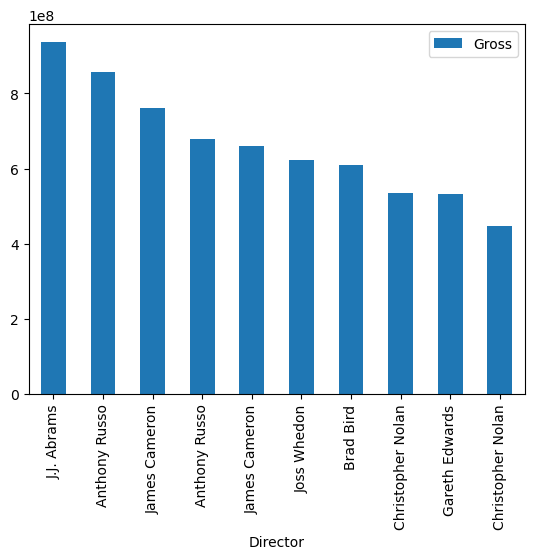

In [8]:
df1=df[['Director','Gross']]
df1=df1.sort_values('Gross', ascending = False)
df1=df1.head(10)
df1.plot(x='Director', y='Gross', kind='bar')
df1

# Directors with most Grossing

In [9]:
df['Stars']= df['Star1'].map(str) +', '+ df['Star2'].map(str) +', '+ df['Star3'].map(str) +', '+ df['Star4'].map(str)

                                                 Stars        Gross
477  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  936662225.0
59   Joe Russo, Robert Downey Jr., Chris Evans, Mar...  858373000.0
623  Sam Worthington, Zoe Saldana, Sigourney Weaver...  760507625.0
60   Joe Russo, Robert Downey Jr., Chris Hemsworth,...  678815482.0
652  Leonardo DiCaprio, Kate Winslet, Billy Zane, K...  659325379.0
357  Robert Downey Jr., Chris Evans, Scarlett Johan...  623279547.0
891  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...  608581744.0
2    Christian Bale, Heath Ledger, Aaron Eckhart, M...  534858444.0
582  Felicity Jones, Diego Luna, Alan Tudyk, Donnie...  532177324.0
63   Christian Bale, Tom Hardy, Anne Hathaway, Gary...  448139099.0


Text(0.5, 1.0, 'Gross vs Stars')

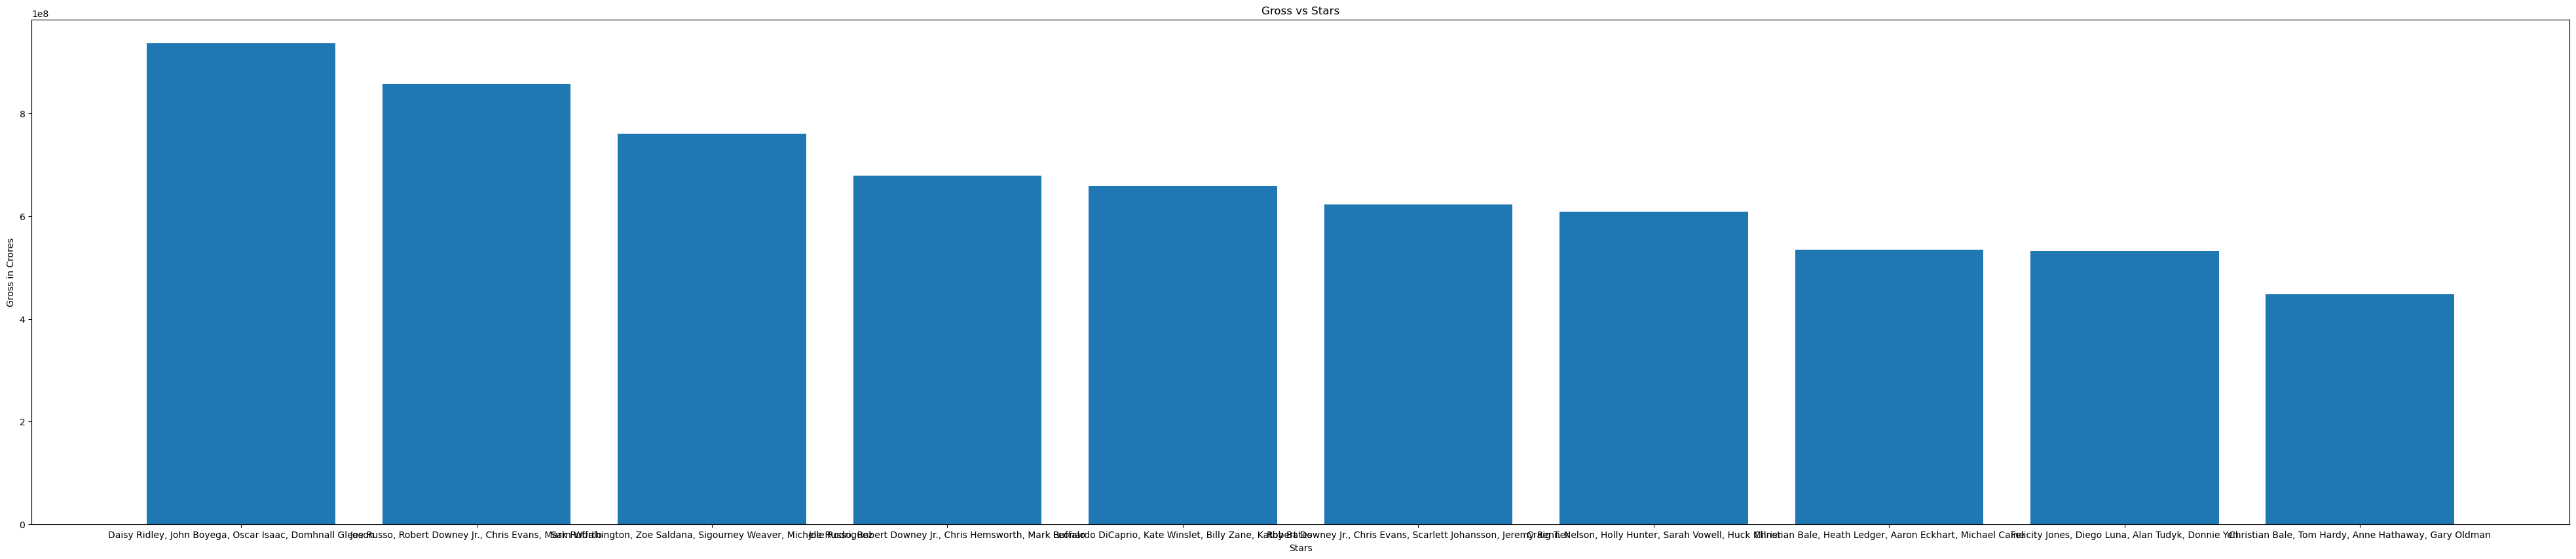

In [11]:
df2=df[['Stars','Gross']]
df2=df2.sort_values('Gross', ascending = False)
df2=df2.head(10)
print(df2)
x= df2["Stars"]
y = df2["Gross"]
fig = plt.figure(figsize = (50, 10))
plt.bar(x,y)
plt.xlabel("Stars")
plt.ylabel("Gross in Crores")
plt.title("Gross vs Stars")

# Combination of Actors with most Grossing

,No_of_Votes,Director
0,2343110,Frank Darabont
2,2303232,Christopher Nolan
8,2067042,Christopher Nolan
9,1854740,David Fincher
6,1826188,Quentin Tarantino
11,1809221,Robert Zemeckis
14,1676426,Lana Wachowski
10,1661481,Peter Jackson
5,1642758,Peter Jackson
1,1620367,Francis Ford Coppola


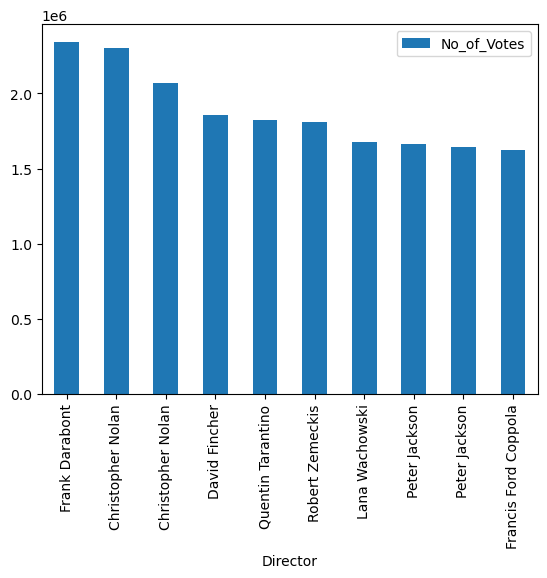

In [12]:
df3=df[['No_of_Votes','Director']]
df3=df3.sort_values('No_of_Votes', ascending = False)
df3=df3.head(10)
df3.plot(x='Director', y='No_of_Votes', kind='bar')
df3

# Director with most number of votes on IMDB

In [13]:
df.pivot_table(index = ['Genre'], aggfunc ='size')

Genre
Action, Adventure              5
Action, Adventure, Comedy      7
Action, Adventure, Drama      13
Action, Adventure, Family      1
Action, Adventure, Fantasy     6
                              ..
Mystery, Romance, Thriller     1
Mystery, Sci-Fi, Thriller      2
Mystery, Thriller              5
Thriller                       1
Western                        4
Length: 184, dtype: int64

In [14]:
df4=df[['No_of_Votes','Stars']]
df4=df4.sort_values('No_of_Votes', ascending = False)
df4=df4.head(10)
df4
# df4.plot(x='Stars', y='No_of_Votes', kind='bar')

,No_of_Votes,Stars
0,2343110,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
2,2303232,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
8,2067042,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
9,1854740,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier"
6,1826188,"John Travolta, Uma Thurman, Samuel L. Jackson,..."
11,1809221,"Tom Hanks, Robin Wright, Gary Sinise, Sally Field"
14,1676426,"Lilly Wachowski, Keanu Reeves, Laurence Fishbu..."
10,1661481,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
5,1642758,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
1,1620367,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."


<Axes: xlabel='Stars'>

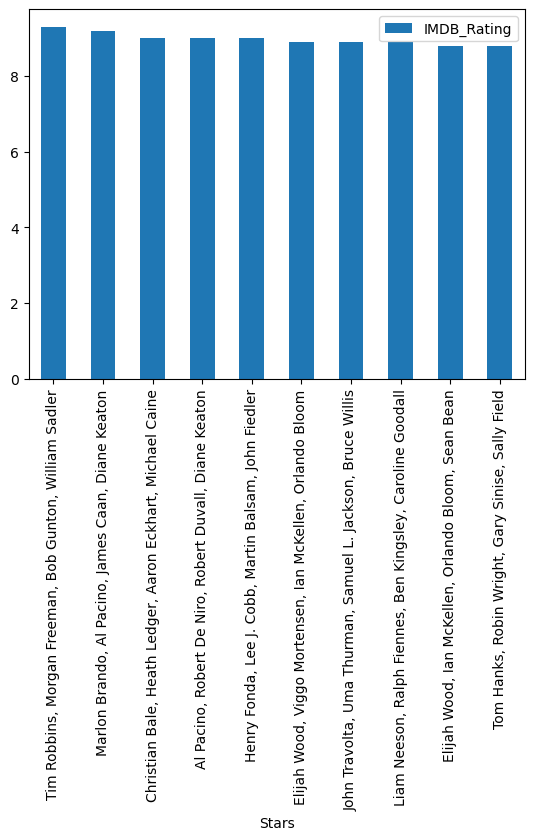

In [15]:
df5=df[['IMDB_Rating','Stars']]
df5=df5.sort_values('IMDB_Rating', ascending = False)
df5=df5.head(10)
df5
df5.plot(x='Stars', y='IMDB_Rating', kind='bar')

# Combination of Stars getting more IMDB Rating

In [16]:
l=[]
for i in df['Genre']:
    l+=i.split(',')
for i in range(len(l)):
    l[i]=str(l[i]).strip()
# l=list(set(l))
f={}
for i in l:
    if i in f:
        f[i]+=1
    else:
        f[i]=1
print(f)
df6= pd.DataFrame(f.items(), columns=['Genre', 'Count'])
df6

{'Drama': 600, 'Crime': 169, 'Action': 156, 'Adventure': 180, 'Biography': 97, 'History': 48, 'Sci-Fi': 62, 'Romance': 104, 'Western': 20, 'Fantasy': 58, 'Comedy': 188, 'Thriller': 118, 'Animation': 75, 'Family': 50, 'War': 45, 'Mystery': 80, 'Music': 29, 'Horror': 27, 'Sport': 17, 'Musical': 12, 'Film-Noir': 11}


,Genre,Count
0,Drama,600
1,Crime,169
2,Action,156
3,Adventure,180
4,Biography,97
5,History,48
6,Sci-Fi,62
7,Romance,104
8,Western,20
9,Fantasy,58


<Axes: xlabel='Genre'>

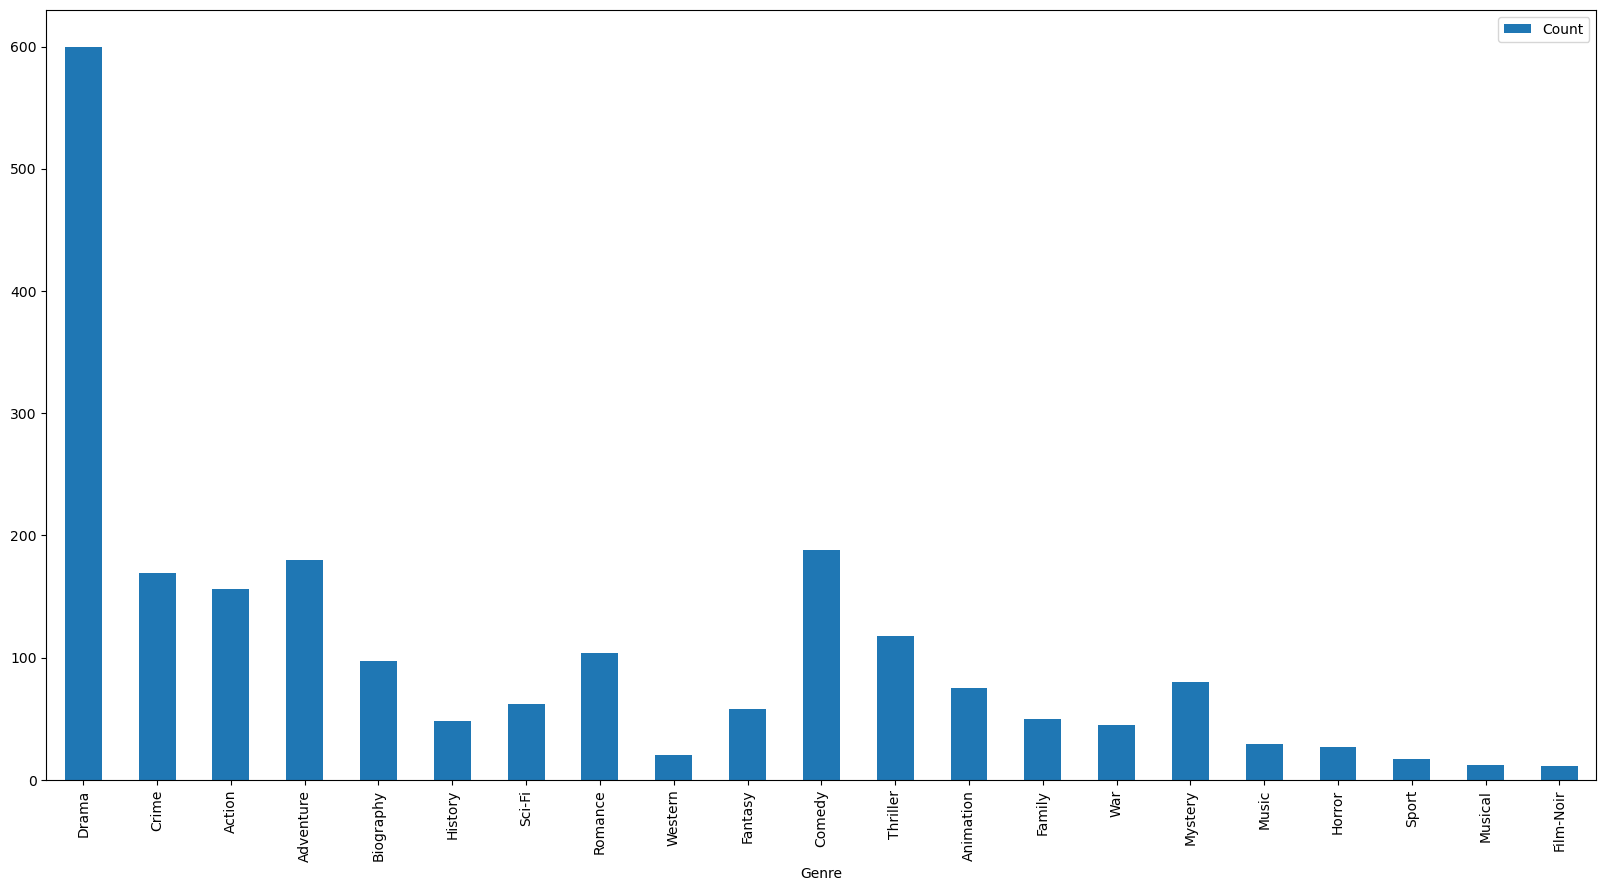

In [17]:
df6.plot(x='Genre', y='Count', figsize=(20,10), kind='bar')

# Most popular Genre